# Project: Communicate Data findings

## Overview
This project involves exploratory data visualization. Python libraries were used to visualize and systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables.

The data set selected is  a US bank's loan containing different attributes that describes  customer. The major aim is to explore the different attributes to identify pattern that describes a fully paid loan and charged off loans
 

## Importing neccessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
import warnings
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

# Loading the data

In [2]:
#Load data
df=pd.read_excel('Loan data.xlsx')

## Assessing Data

In [3]:
#checking first few lines of the data.head()
df.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,0.1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,0.2199,7019.0,NaN,NaN,148.0,170.0,28.0,9.0,4.0,NaN,14.0,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,0.0999,4891.0,NaN,NaN,128.0,147.0,80.0,11.0,0.0,53.0,11.0,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,0.1269,17619.0,NaN,NaN,130.0,172.0,68.0,2.0,4.0,41.0,9.0,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,0.1531,12321.0,1.0,10372.0,167.0,145.0,18.0,18.0,1.0,NaN,7.0,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


In [4]:
#Checking random samples
df.sample(5)

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
5015,84998719,OH,93000.0,3 years,Database Administrator,OWN,659.43,20000,car,36 months,0.1149,12651.0,5.0,2944.0,69.0,121.0,12.0,8.0,2.0,13.0,5.0,9.0,6.0,0.0,2.0,13,0.0,1,22,53891.0,Fully Paid
3014,88153993,FL,60000.0,10+ years,Bartender,RENT,325.33,9000,car,36 months,0.1799,675.0,1.0,1161.0,68.0,113.0,4.0,4.0,0.0,18.0,11.0,2.0,9.0,0.0,2.0,10,0.0,0,13,6071.0,Fully Paid
3841,124842755,TX,98000.0,< 1 year,Maintenance Supervisor,RENT,529.88,20000,credit_card,60 months,0.2000,1032.0,3.0,1117.0,64.0,43.0,4.0,4.0,0.0,NaN,2.0,5.0,6.0,0.0,2.0,6,50.0,0,11,6191.0,Fully Paid
9145,65754379,CA,114000.0,< 1 year,Finance Manager,RENT,759.52,30000,debt_consolidation,60 months,0.1786,51637.0,1.0,13766.0,125.0,186.0,43.0,13.0,3.0,NaN,7.0,8.0,4.0,0.0,0.0,8,100.0,0,19,147114.0,Fully Paid
4385,61490435,CA,35000.0,5 years,Bar Tender,MORTGAGE,377.04,12000,credit_card,36 months,0.0818,1806.0,NaN,NaN,110.0,110.0,2.0,2.0,0.0,49.0,4.0,12.0,6.0,0.0,1.0,10,50.0,0,18,18063.0,Fully Paid


### Checking the different columns available in the data

In [5]:

df.columns

Index(['id', 'addr_state', 'annual_inc', 'emp_length', 'emp_title',
       'home_ownership', 'installment', 'loan_amnt', 'purpose', 'term',
       'int_rate', 'avg_cur_bal', 'inq_last_12m', 'max_bal_bc',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'total_acc', 'total_bal_ex_mort',
       'loan_status'],
      dtype='object')

### How big is the dataset ?

In [6]:
df.shape

(18324, 31)

### Does the data contain any missing values? And what is the data type of each columns?
Identifying the category of each variable in the dataset forms a very important part of a data analysis project. It helps to process each variable with the right pre-processing strategy that 
would work for it or determine the type of statistical analysis that should be applied for the best 
results. 

In [7]:
#Check the data type and count of each column in the data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  object 
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  object 
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

## Observation:
From the above output, the columns with highest number of missing values are mths_since_last_delinq,max_bal_bc,inq_last_12m. The number of missing values in this

## Check for duplicates in the data

In [8]:
sum(df.duplicated())

0

## Check for the number of unique values in each column

In [9]:
df.nunique()

id                        18324
addr_state                   51
annual_inc                 2434
emp_length                   11
emp_title                 10040
home_ownership                5
installment               10246
loan_amnt                  1111
purpose                      14
term                          2
int_rate                    465
avg_cur_bal               12635
inq_last_12m                 25
max_bal_bc                 6440
mo_sin_old_il_acct          355
mo_sin_old_rev_tl_op        564
mo_sin_rcnt_rev_tl_op       150
mo_sin_rcnt_tl              100
mort_acc                     23
mths_since_last_delinq       98
num_bc_tl                    43
num_il_tl                    64
num_op_rev_tl                44
num_tl_90g_dpd_24m           11
num_tl_op_past_12m           20
open_acc                     49
percent_bc_gt_75            111
pub_rec_bankruptcies          7
total_acc                    93
total_bal_ex_mort         16450
loan_status                   2
dtype: i

## Observation:
From the above output, the employment title column seems to be problematic. A total number of 10040 is very high and would not be easy to visualize or encode for the training of a machine learning model. Hence, there is a need to reconstruct some of the variables

In [10]:
#checking the value count of each unique values in employment length column
df['emp_length'].value_counts()

10+ years    6204
2 years      1636
< 1 year     1456
3 years      1387
1 year       1198
5 years      1107
4 years      1068
6 years       840
8 years       803
7 years       787
9 years       664
Name: emp_length, dtype: int64

## Checking the summary statistics 

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,18324.0,6.832645e+07,4.245703e+07,300918.0000,3.491424e+07,6.838023e+07,9.730784e+07,1.708249e+08
annual_inc,18324.0,8.017611e+04,6.487345e+04,3000.0000,4.700000e+04,6.500000e+04,9.500000e+04,2.616000e+06
installment,18324.0,4.675430e+02,2.780998e+02,30.6500,2.593025e+02,3.974800e+02,6.357200e+02,1.503890e+03
loan_amnt,18324.0,1.552266e+04,9.349294e+03,1000.0000,8.000000e+03,1.400000e+04,2.100000e+04,4.000000e+04
int_rate,18324.0,1.385070e-01,4.822253e-02,0.0531,1.049000e-01,1.333000e-01,1.699000e-01,3.099000e-01
avg_cur_bal,17758.0,1.346660e+04,1.655073e+04,0.0000,3.129000e+03,7.137000e+03,1.843650e+04,3.412360e+05
inq_last_12m,9395.0,2.301863e+00,2.523087e+00,0.0000,1.000000e+00,2.000000e+00,3.000000e+00,2.800000e+01
max_bal_bc,9395.0,5.728533e+03,5.628028e+03,0.0000,2.170500e+03,4.244000e+03,7.357000e+03,9.960900e+04
mo_sin_old_il_acct,17192.0,1.253481e+02,5.299678e+01,1.0000,9.700000e+01,1.290000e+02,1.520000e+02,5.300000e+02
mo_sin_old_rev_tl_op,17760.0,1.807508e+02,9.512232e+01,5.0000,1.160000e+02,1.640000e+02,2.310000e+02,6.740000e+02


### Quick vizualization of the numeric variables

In [12]:
#for col in df.select_dtypes(include=object).columns: 
    # print the name of the column
    #print(col)
    #sns.distplot(df[col])

annual_inc


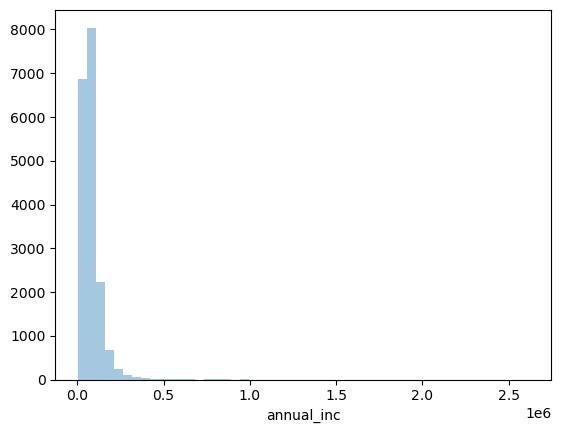

installment


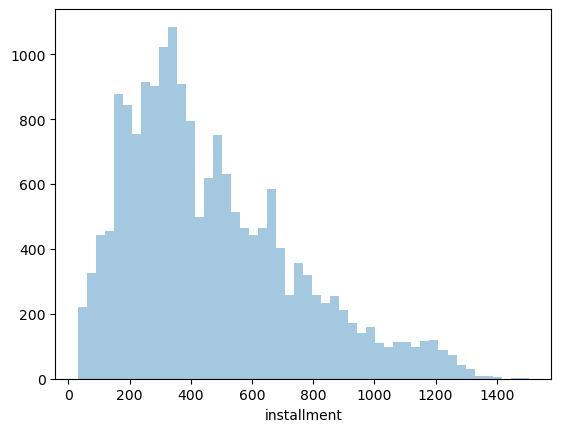

loan_amnt


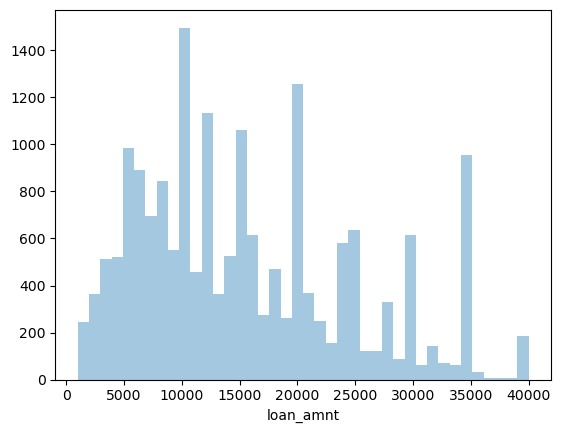

int_rate


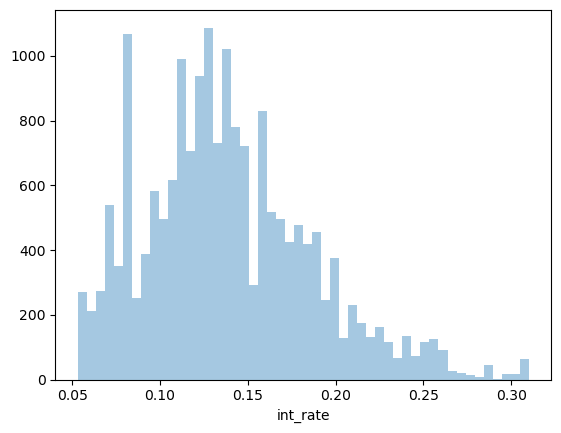

avg_cur_bal


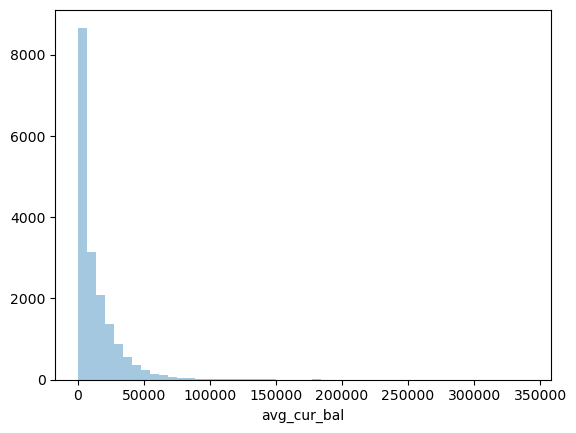

inq_last_12m


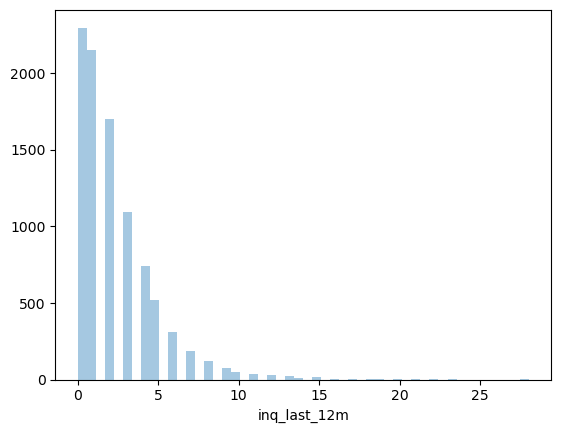

max_bal_bc


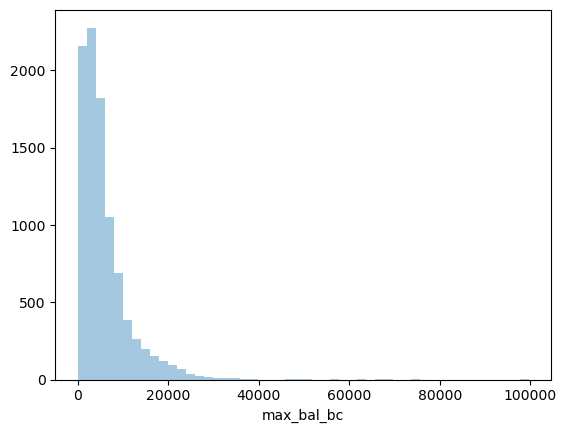

mo_sin_old_il_acct


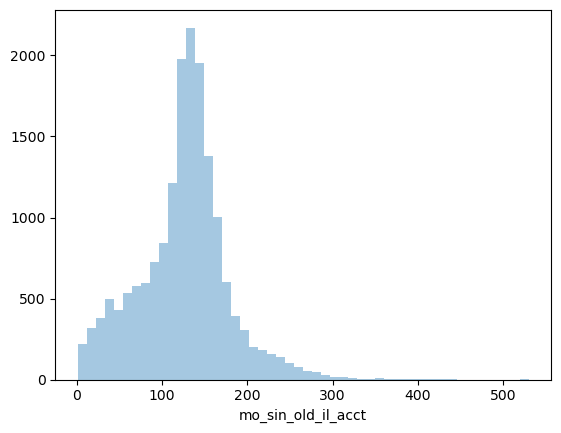

mo_sin_old_rev_tl_op


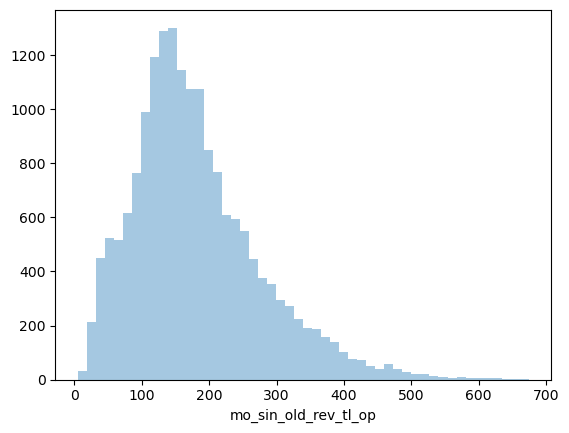

mo_sin_rcnt_rev_tl_op


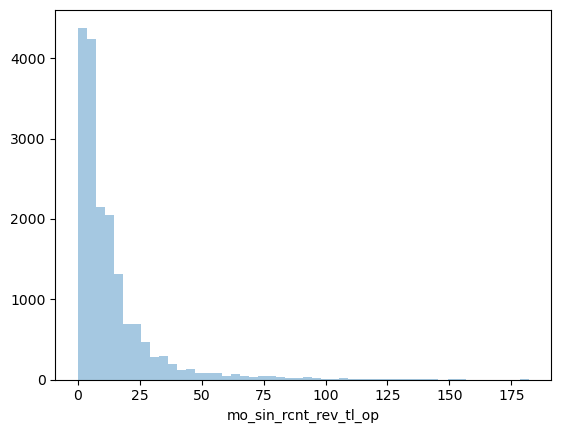

mo_sin_rcnt_tl


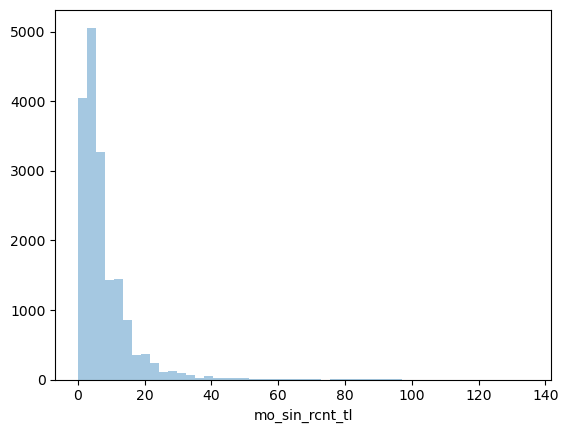

mort_acc


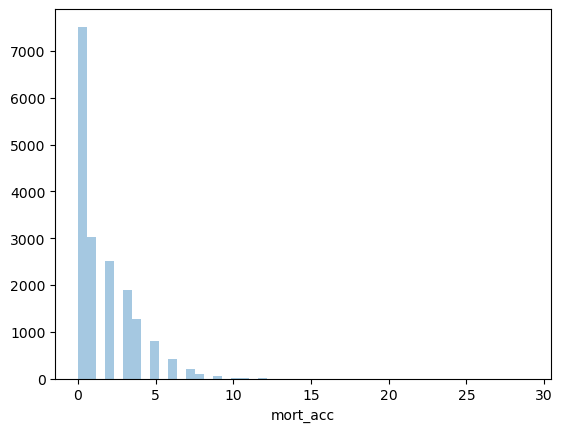

mths_since_last_delinq


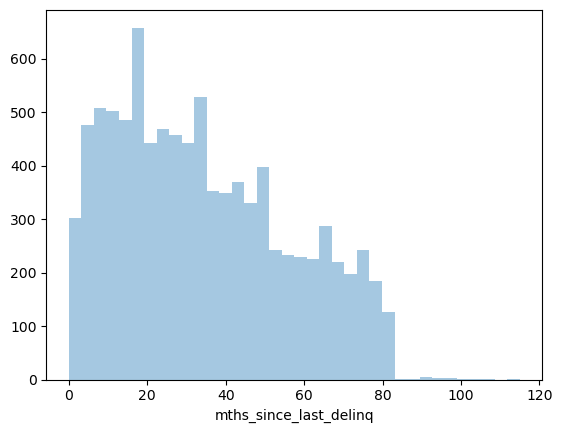

num_bc_tl


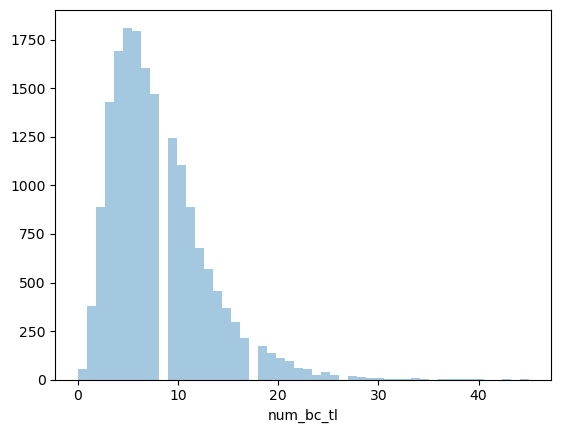

num_il_tl


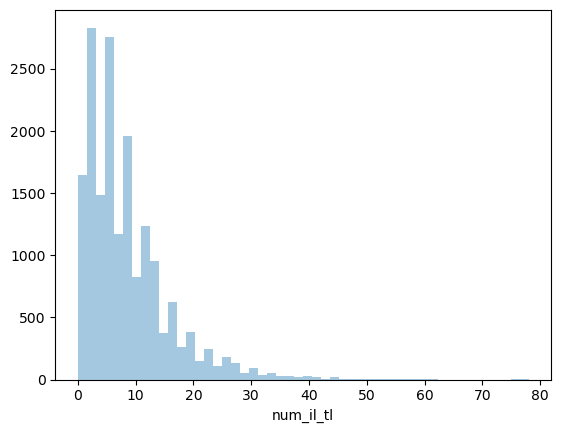

num_op_rev_tl


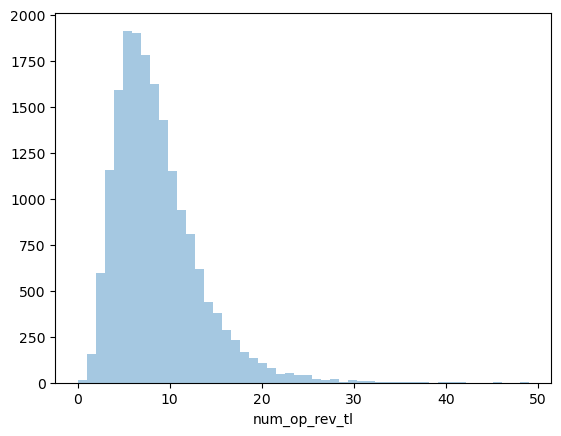

num_tl_90g_dpd_24m


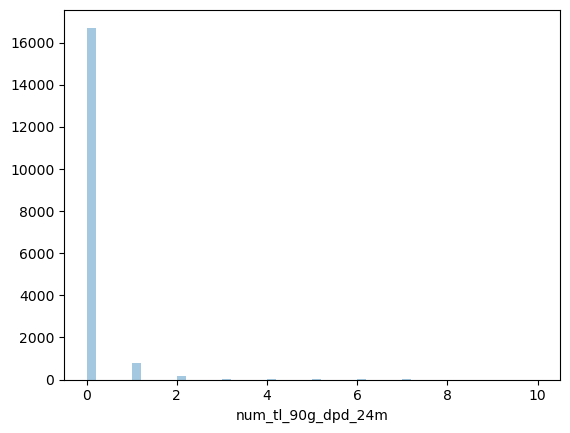

num_tl_op_past_12m


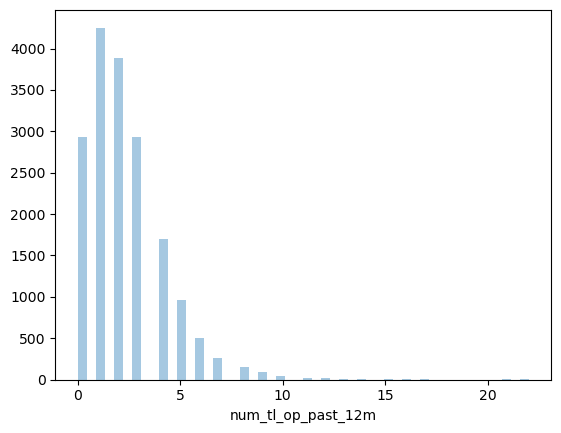

open_acc


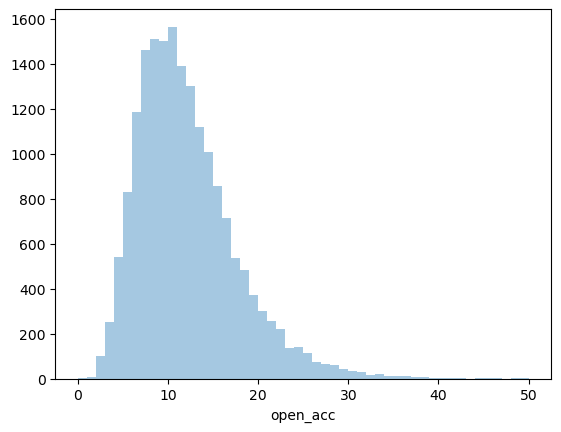

percent_bc_gt_75


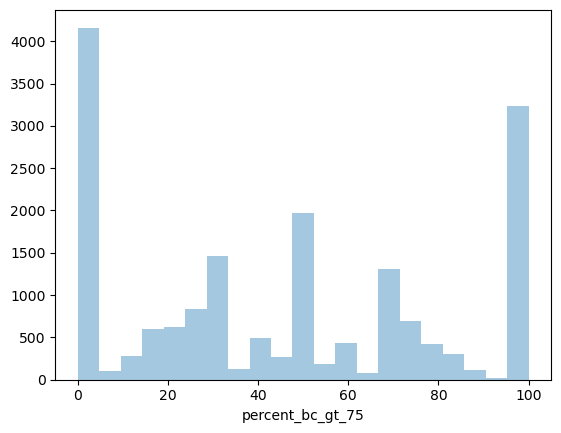

pub_rec_bankruptcies


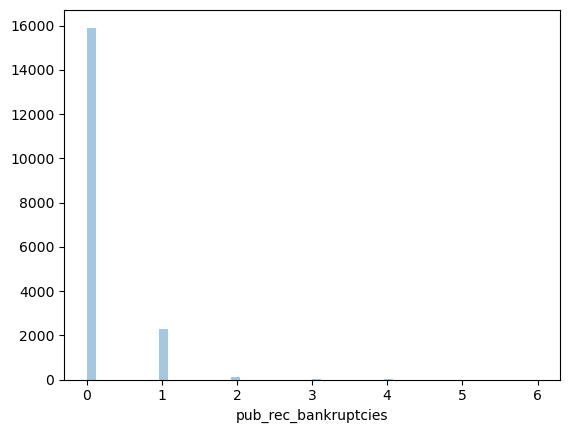

total_acc


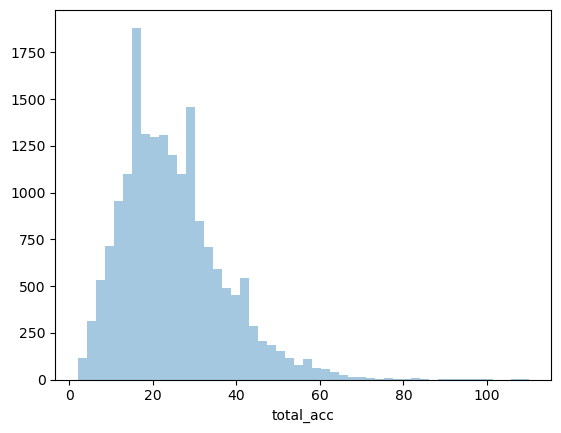

total_bal_ex_mort


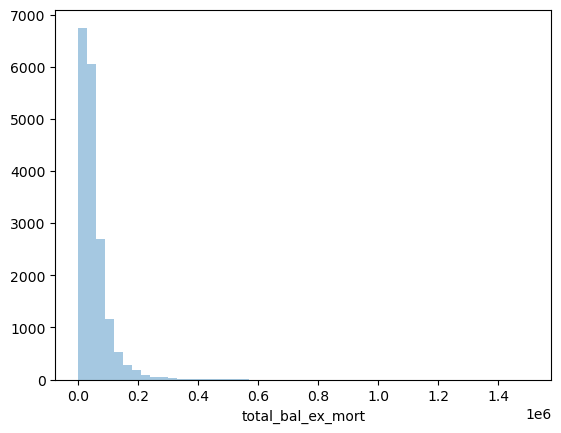

In [13]:
warnings.filterwarnings('ignore')
columns_list=['annual_inc', 'installment', 'loan_amnt',
       'int_rate', 'avg_cur_bal', 'inq_last_12m', 'max_bal_bc',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'total_acc', 'total_bal_ex_mort']
for col in columns_list:
    print(col)
    sns.distplot(df[col],kde=False)
    plt.show()

## Observation
The plot shows that some of the variables are highly skewed while some are fairly distributed

# Issues identified within the data

## Quality Issues
- The `max_bal_bc` and `inq_last_12m` contain lot of missing values
- Some other columns in the data also contains NA
- The `emp_title` contains a large number of unique(a total of 10040) values that normally should fall under the same catogories - NA in column `mths_since_last_delinq` should be replaced with Zero, since this could means the customer has never defaulted in  their payment
- remove leading white space from the cells in `term` column
- convert emp_length, and term into ordered categorical types
- convert emp_title, addr_state, home_ownership, purpose, and loan_status into categorical types


### Data Cleaning
To ensure that the data is in good condition for analysis, some cleaning would be perfomed on the data.
The first step is creating a copy of the dataframe so all cleaning wont be performed on the original data

##  Creating a copy of the dataframe

In [14]:

cleaned_df=df.copy()

In [15]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  object 
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  object 
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

### Issue: remove leading white space from the cells in `term` column

#### Code

In [16]:
cleaned_df['term']=cleaned_df['term'].str.strip()


#### Check

In [17]:
cleaned_df['term'].unique()

array(['36 months', '60 months'], dtype=object)

### Issue: convert emp_length, and term into ordered categorical types

#### Code

In [18]:
#converting emp_length, and term into ordered categorical types
ordinal_var_dict = {'emp_length': ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                    'term': ['36 months', '60 months']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    cleaned_df[var] =  cleaned_df[var].astype(ordered_var)

#### Check

In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      18324 non-null  int64   
 1   addr_state              18324 non-null  object  
 2   annual_inc              18324 non-null  float64 
 3   emp_length              17150 non-null  category
 4   emp_title               17042 non-null  object  
 5   home_ownership          18324 non-null  object  
 6   installment             18324 non-null  float64 
 7   loan_amnt               18324 non-null  int64   
 8   purpose                 18324 non-null  object  
 9   term                    18324 non-null  category
 10  int_rate                18324 non-null  float64 
 11  avg_cur_bal             17758 non-null  float64 
 12  inq_last_12m            9395 non-null   float64 
 13  max_bal_bc              9395 non-null   float64 
 14  mo_sin_old_il_acct    

### Issue: convert emp_title, addr_state, home_ownership, purpose, and loan_status into categorical types

#### Code

In [20]:
# converting emp_title, addr_state, home_ownership, purpose, and loan_status into categorical types

var_list = ['addr_state', 'home_ownership', 'purpose', 'loan_status']

for var in var_list:
    cleaned_df[var] = cleaned_df[var].astype('category')

#### Check

In [21]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      18324 non-null  int64   
 1   addr_state              18324 non-null  category
 2   annual_inc              18324 non-null  float64 
 3   emp_length              17150 non-null  category
 4   emp_title               17042 non-null  object  
 5   home_ownership          18324 non-null  category
 6   installment             18324 non-null  float64 
 7   loan_amnt               18324 non-null  int64   
 8   purpose                 18324 non-null  category
 9   term                    18324 non-null  category
 10  int_rate                18324 non-null  float64 
 11  avg_cur_bal             17758 non-null  float64 
 12  inq_last_12m            9395 non-null   float64 
 13  max_bal_bc              9395 non-null   float64 
 14  mo_sin_old_il_acct    

### Issue1: Dropping problematic columns

Since the `id` is just a customer unique identifier, it not going to be useful in any part of the analysis, hence this column will be dropped. The `max_bal_bc` and `inq_last_12m` also contain lot of missing values and they don't seems to contain any special information that will be useful in our analysis as well. Hence they will also be dropped

### Code

In [22]:
#drop the  two columns containing NA
cleaned_df.drop(columns=['max_bal_bc','inq_last_12m'], inplace = True)

### Check

In [23]:
cleaned_df.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3 years,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36 months,0.1149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1 year,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60 months,0.2199,7019.0,148.0,170.0,28.0,9.0,4.0,NaN,14.0,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1 year,Senior manager,RENT,806.57,25000,credit_card,36 months,0.0999,4891.0,128.0,147.0,80.0,11.0,0.0,53.0,11.0,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10+ years,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36 months,0.1269,17619.0,130.0,172.0,68.0,2.0,4.0,41.0,9.0,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10+ years,Account Manager,MORTGAGE,41.79,1200,other,36 months,0.1531,12321.0,167.0,145.0,18.0,18.0,1.0,NaN,7.0,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


### Issue 2: Filling the NA in the `mths_since_last_delinq` column with zero

### Code

In [24]:
#Filling `NA` in the `mths_since_last_delinq` column with zero
cleaned_df['mths_since_last_delinq']=cleaned_df['mths_since_last_delinq'].fillna(0)

### Check

In [25]:
sum(cleaned_df['mths_since_last_delinq'].isnull())

0

### Issue 3: Drop rows with missing values

### code

In [26]:
cleaned_df.dropna(inplace= True)

### check

In [27]:
cleaned_df.isnull().sum().sum()

0

In [28]:
cleaned_df.shape

(15866, 29)

### issue 4: drop the id column

### code

In [29]:
cleaned_df.drop(columns=['id'], inplace = True)

### Check

In [30]:
cleaned_df.columns

Index(['addr_state', 'annual_inc', 'emp_length', 'emp_title', 'home_ownership',
       'installment', 'loan_amnt', 'purpose', 'term', 'int_rate',
       'avg_cur_bal', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_last_delinq', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'total_acc',
       'total_bal_ex_mort', 'loan_status'],
      dtype='object')

In [31]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15866 entries, 1 to 18323
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   addr_state              15866 non-null  category
 1   annual_inc              15866 non-null  float64 
 2   emp_length              15866 non-null  category
 3   emp_title               15866 non-null  object  
 4   home_ownership          15866 non-null  category
 5   installment             15866 non-null  float64 
 6   loan_amnt               15866 non-null  int64   
 7   purpose                 15866 non-null  category
 8   term                    15866 non-null  category
 9   int_rate                15866 non-null  float64 
 10  avg_cur_bal             15866 non-null  float64 
 11  mo_sin_old_il_acct      15866 non-null  float64 
 12  mo_sin_old_rev_tl_op    15866 non-null  float64 
 13  mo_sin_rcnt_rev_tl_op   15866 non-null  float64 
 14  mo_sin_rcnt_tl        

# issue 5: Large number of unique values in the `emp_title`column


In [32]:
cleaned_df.emp_title.unique()

array(['Curriculum & Implementation Manager', 'Senior manager ',
       'Border Patrol Agent', 'Account Manager', 'Supply Tech',
       'Senior Vice President', "HHS Office on Women's Health",
       'Research Facilities Coordinator II', 'Teacher', 'Asst Corp Sec',
       'Custom and Border Protection', 'Project manager',
       'Executive Director ', 'Front Desk', 'accounting manager',
       'Supervisor', 'Sales', 'Owner', 'PPS Manager',
       'Home Care physical therapist', 'Registered Nurse', 'Area Manager',
       'Police Officer', "Carter's furniture", 'Site coordinator',
       'Software Developer', 'Customer Service Technician',
       'Sr. Mechanical Engineer', 'production manager', 'GENERAL MANAGER',
       'Creative Pointe Designs', 'Shared Living Provider Specialist',
       'teacher', 'School Counselor ', 'VP Supply Chain',
       'area controller', 'bench work ( jelweler)', 'chef',
       'Plant operator', 'Marketing Coordinator', 'Human Resources',
       'Account Admin

# Solution :Merge job titles

### Code

In [33]:
#Convert job titles to lowercase
cleaned_df.emp_title=df.emp_title.str.lower()

In [34]:
cleaned_df.emp_title

1            curriculum & implementation manager
2                                senior manager 
3                            border patrol agent
4                                account manager
5                                    supply tech
                          ...                   
18319                                   director
18320                                 journalist
18321                           process operator
18322      instructional specialist/applications
18323    ceritified registered nurse anesthetist
Name: emp_title, Length: 15866, dtype: object

In [35]:
#~print(cleaned_df.emp_title.str.contains('manager'))

In [36]:
emp_title_dict = {'hr':'human resources' , 'human resource' : 'human resources', 'vp' : 'top executive','owner' : 'top executive','founder' : 'top executive', 'president' : 'top executive', 'ceo' : 'top executive', 'data' : 'ICT expert', 'software' : 'ICT expert','programmer': 'ICT expert', 'computer': 'ICT expert','telecom': 'ICT expert', 'nurse': 'nurse', 'police':  'police officer', 'accountant' : 'accouting', 'accountant' : 'accountant','teacher':'school staff',
                  'secretary': 'secretary', 'prison': 'prison staff', 'correction': 'prison staff', 'supervisor' : 'supervisor', 'bank':'banker', 'school':'school staff', 'lawrence':'school staff','contractor':'contractor', 
                  'manager' : 'manager', 'manger' : 'manager','director' : 'director', 'care': 'care practitioner/giver', 'doctoral': 'PhD',
                  'cyber' : 'cyber_expert', 'air force' : 'military officer', 'navy':'military officer', 'naval':'military officer', 'academy': 'academician', 'academic': 'academician',
                  'army' : 'military officer', 'soldier' : 'military officer', 'mechanic' : 'mechanic', 'engineer' : 'engineer', 'consult' : 'consultant',
                  'military' : 'military officer', 'admin' : 'admin officer/administrator', 'teller': 'teller', 'cler' : 'clerk', 'post' : 'postal officer', 'traffic' : 'traffic officer',
                  'artist': 'artist', 'products' : 'others', 'law' : 'law & legal', 'techno': 'technology', 'techni' : 'technician', 'dispatch' : 'dispatch', 'compliance' : 'compliance', 
                  'communication' : 'communication', 'contract' : 'contract staff', 'contratc' : 'contract staff', 'educat' : 'educator', 'graphic' : 'graphic designer', 'fire' : 'fire fighter/expert',
                  'equip' : 'equipment manager', 'insur' : 'insurance', 'farm' : 'farmer', 'dental' : 'dental', 'medical' : 'medical', 'advisor' : 'advisor', 'drive' : 'driver', 'analyst' : 'analyst', 'directot' : 'director', 'paramedic' : 'paramedical',
                  'sales' : 'sales rep', 'food' : 'food services', 'nutrition' : 'nutritionist', 'diet' : 'diet expert/dietitian', 'supevisor' : 'supervisor', 'claim' : 'claims expert', 'writer' : 'writer', 'chiropractic': 'doctor', 'rn in er' : 'nurse',
                  'architect' : 'architect', 'photo' : 'media personnel', 'video' : 'media personnel', 'customer' : 'customer service', 'assistant' : 'assistant', 'agent' : 'agent', 'analysis' : 'analyst',
                  'couns' : 'counselor', 'judge' : 'judge', 'operator' : 'operator', 'healt' : 'health expert', 'mgr' : 'manager', 'veterin' : 'veterinarian'}

In [37]:
for key, val in emp_title_dict.items():
    if key == 'event':
        cleaned_df = cleaned_df.replace({'emp_title': r'^' + key}, {'emp_title': val},regex=True) 
    elif key == 'hr':
        cleaned_df = cleaned_df.replace({'emp_title': r'^' + key}, {'emp_title': val},regex=True) 
    elif key == 'prevention':
        cleaned_df = cleaned_df.replace({'emp_title': r''+key }, {'emp_title': val},regex=True)
    else:
        cleaned_df = cleaned_df.replace({'emp_title': r'.*' + key + '.*'}, {'emp_title': val},regex=True)

## check

In [38]:
#checking the number of unique variables in each employment column
cleaned_df.emp_title.nunique()

3813

## Observation: 
From the above output, the number of unique variables in the employment title column has been greatly reduced to a great extent, though further cleaning is still required to bring it down to a lower quantity.

In [39]:
cleaned_df['mo_sin_old_il_acct'].describe()

count    15866.000000
mean       125.480146
std         52.763884
min          1.000000
25%         97.000000
50%        129.000000
75%        153.000000
max        433.000000
Name: mo_sin_old_il_acct, dtype: float64

In [40]:
cleaned_df['mo_sin_old_il_acct'].sample(10)

12244    139.0
8077     176.0
3925     126.0
10417    198.0
10608    146.0
14811    154.0
9607     151.0
14964    149.0
7772     135.0
16435    203.0
Name: mo_sin_old_il_acct, dtype: float64

### issue 6: convert emp_length and term to ordered categorical types

#### Code

In [41]:
cleaned_df.emp_length.unique()

['1 year', '10+ years', '< 1 year', '5 years', '8 years', ..., '6 years', '3 years', '9 years', '7 years', '4 years']
Length: 11
Categories (11, object): ['< 1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' < '9 years' < '10+ years']

In [42]:
cleaned_df.term.unique()

['60 months', '36 months']
Categories (2, object): ['36 months' < '60 months']

In [43]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15866 entries, 1 to 18323
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   addr_state              15866 non-null  category
 1   annual_inc              15866 non-null  float64 
 2   emp_length              15866 non-null  category
 3   emp_title               15863 non-null  object  
 4   home_ownership          15866 non-null  category
 5   installment             15866 non-null  float64 
 6   loan_amnt               15866 non-null  int64   
 7   purpose                 15866 non-null  category
 8   term                    15866 non-null  category
 9   int_rate                15866 non-null  float64 
 10  avg_cur_bal             15866 non-null  float64 
 11  mo_sin_old_il_acct      15866 non-null  float64 
 12  mo_sin_old_rev_tl_op    15866 non-null  float64 
 13  mo_sin_rcnt_rev_tl_op   15866 non-null  float64 
 14  mo_sin_rcnt_tl        

In [44]:
# converting emp_length and term into ordered categorical types
ordinal_var_dict = {'emp_length': ['< 1 year', '1 year','2 years', '3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'],
                    'term': ['36 months','60 months']
                   }

for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        cleaned_df[var] = cleaned_df[var].astype(ordered_var)

In [45]:
#convert emp_length, and term into ordered categorical types
ordinal_var_dict = {'emp_length': ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                    'term': ['36 months', '60 months']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    cleaned_df[var] =  cleaned_df[var].astype(ordered_var)



In [46]:
cleaned_df.sample(5)

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
6902,FL,80000.0,1 year,manager,OWN,228.99,7500,home_improvement,36 months,0.0624,3747.0,128.0,172.0,54.0,9.0,0.0,0.0,11.0,8.0,5.0,0.0,1.0,7,0.0,0,23,26230.0,Fully Paid
16212,RI,50000.0,7 years,team leader,RENT,51.62,1600,moving,36 months,0.0999,2053.0,109.0,144.0,23.0,11.0,0.0,28.0,7.0,15.0,7.0,0.0,1.0,8,20.0,0,27,14371.0,Fully Paid
4535,NY,95000.0,10+ years,operator,RENT,920.91,30000,credit_card,60 months,0.2727,4657.0,157.0,154.0,23.0,13.0,0.0,43.0,7.0,13.0,6.0,0.0,0.0,7,66.7,0,30,32600.0,Charged Off
3864,CO,61000.0,< 1 year,school staff,RENT,979.25,25000,debt_consolidation,36 months,0.2388,12454.0,137.0,268.0,55.0,53.0,0.0,32.0,4.0,6.0,7.0,0.0,0.0,9,100.0,0,17,112090.0,Fully Paid
9053,OR,28000.0,10+ years,assistant,RENT,395.37,11200,debt_consolidation,36 months,0.1629,2987.0,140.0,129.0,13.0,8.0,0.0,0.0,3.0,10.0,6.0,0.0,1.0,9,0.0,0,19,26883.0,Fully Paid


In [47]:
cleaned_df.dropna(inplace=True)

In [48]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15863 entries, 1 to 18323
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   addr_state              15863 non-null  category
 1   annual_inc              15863 non-null  float64 
 2   emp_length              15863 non-null  category
 3   emp_title               15863 non-null  object  
 4   home_ownership          15863 non-null  category
 5   installment             15863 non-null  float64 
 6   loan_amnt               15863 non-null  int64   
 7   purpose                 15863 non-null  category
 8   term                    15863 non-null  category
 9   int_rate                15863 non-null  float64 
 10  avg_cur_bal             15863 non-null  float64 
 11  mo_sin_old_il_acct      15863 non-null  float64 
 12  mo_sin_old_rev_tl_op    15863 non-null  float64 
 13  mo_sin_rcnt_rev_tl_op   15863 non-null  float64 
 14  mo_sin_rcnt_tl        

## To undederstand the behaviour of different variables within the data, we performed some visualization

# Univariate Visualization

## Defining a function that plot takes  a variable and generate its count plot

In [49]:
    
def Count_plot(data1, x):
    """ This takes a dataset and a variable as an argument and create a barchar/countplot of the variable"""
    # Get the indexes of the Series
    freq = data1[x].value_counts()
    base_color = sns.color_palette()[0]
    #gen_order = freq.index
    gen_order = freq.index
    graph= sns.countplot(data=data1, x=x, color=base_color,order=gen_order)
    return graph

##  Question: what is the distribution of the customers across the different states in US

## Visualization

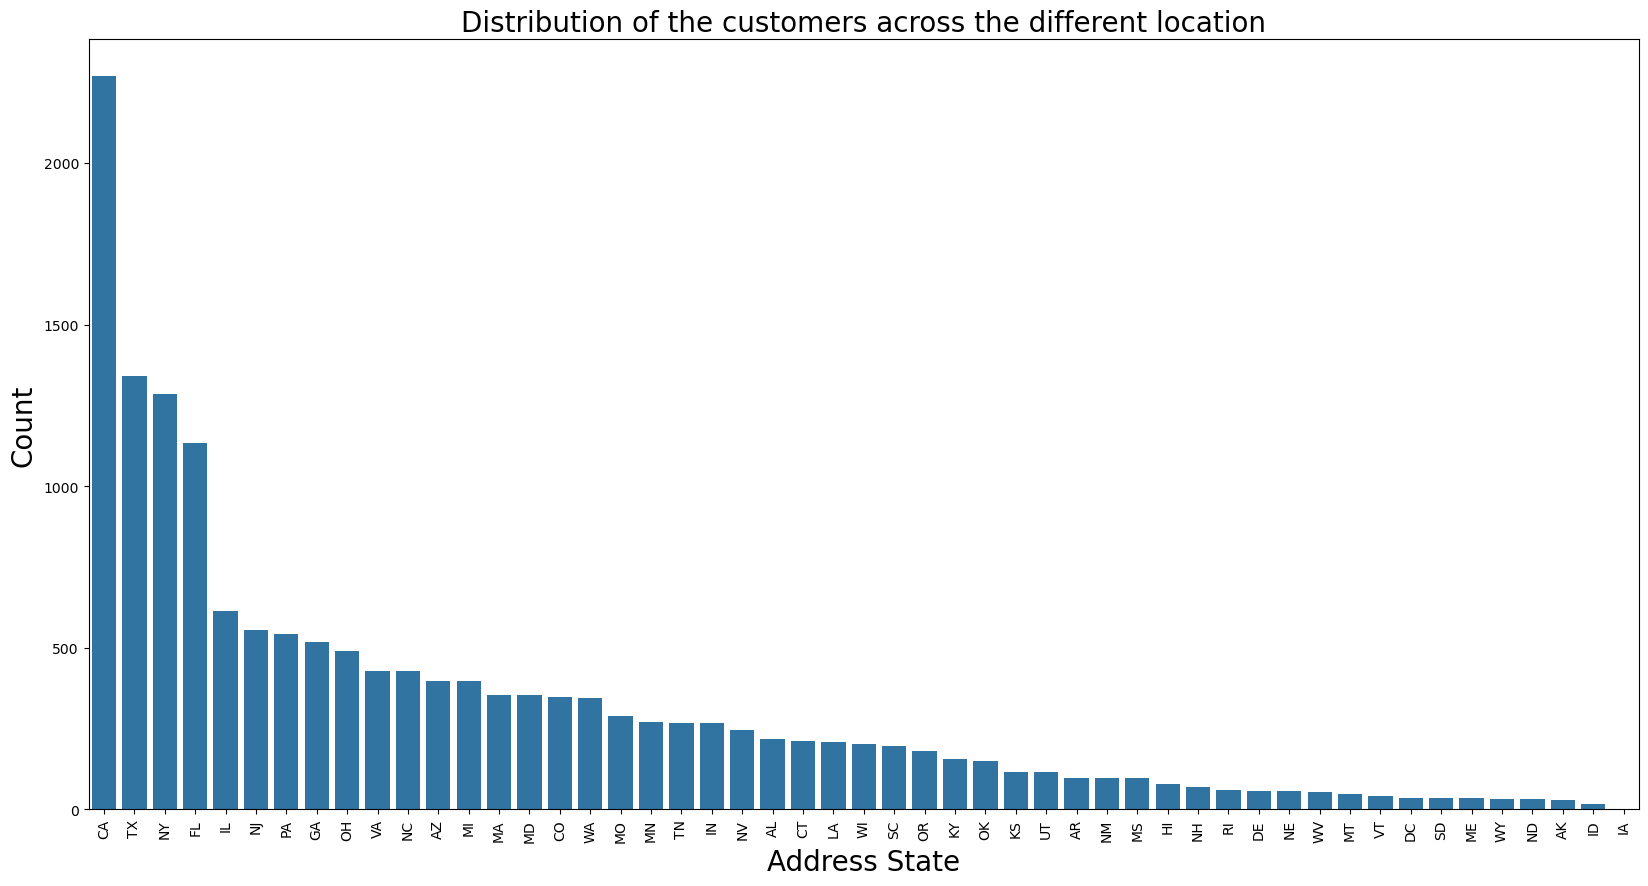

In [50]:
plt.figure(figsize=(20,10))
Count_plot(data1=cleaned_df, x='addr_state')
plt.xticks(rotation=90)
dum=plt.title('Distribution of the customers across the different location',fontsize=(20))
dum=plt.xlabel('Address State',fontsize=(20))
dum=plt.ylabel('Count',fontsize=(20));


### Observation:
From the graph, most of the customers are from CA,TX,NY,AND FL while on small number of customers are from SD,ME,WY,ND, AK,ID and IA. CA has the highest number of customers with a value of about 2500 customers while IA has the lowest number of customers which is about 20. The rest of the customers are distributed within other states

## Question: what is the distribution of the different employment length among  the customers ?

## VIsualization

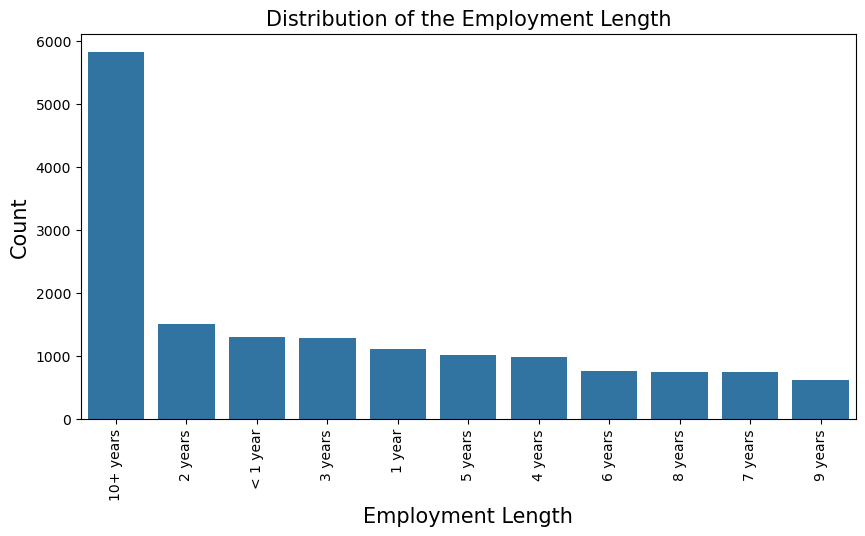

In [51]:
plt.figure(figsize=(10,5))
Count_plot(data1=cleaned_df, x='emp_length')
plt.xticks(rotation=90)
dum=plt.title('Distribution of the Employment Length',fontsize=(15))
dum=plt.xlabel('Employment Length',fontsize=(15))
dum=plt.ylabel('Count',fontsize=(15));

# Observation:
Most of the customers has employment length of 10+ years followed by those with 2 years length while the rest are distributed among other values. This could implied that most of their customers occupies senior level roles at their work place

## Question: What is the Top  10 most common employment title among the customers?

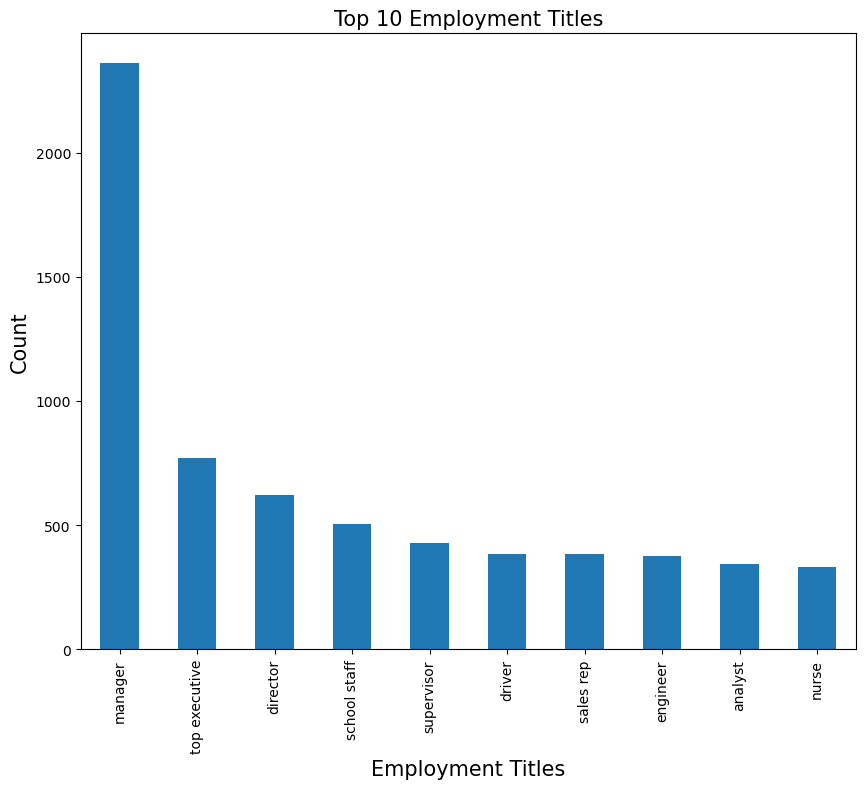

In [52]:
top_10 = cleaned_df['emp_title'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
dum=plt.title('Top 10 Employment Titles',fontsize=(15))
dum=plt.xlabel('Employment Titles',fontsize=(15))
dum=plt.ylabel('Count',fontsize=(15));

## Observation:
From the above plot it can be seen that the Top 3 employment titles are usually attributed to senior role in organisations. This confirms the observation made earlier about the employment length where most of the customers falls within 10+years of employment length.

# Question: What is the distribution of the different Home ownership status among the customers?

##  Visualization

In [53]:
cleaned_df['home_ownership'] = cleaned_df['home_ownership'].replace({'ANY':'OTHER'})

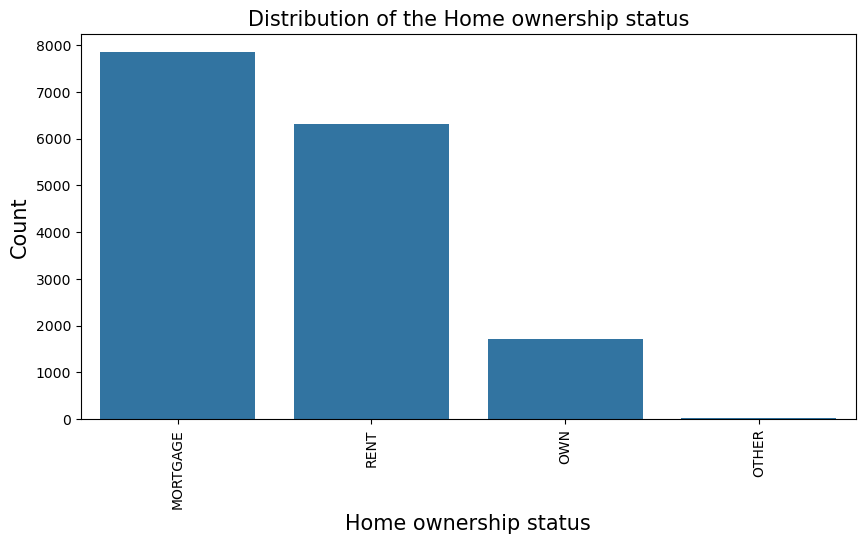

In [54]:

plt.figure(figsize=(10,5))
Count_plot(data1=cleaned_df, x='home_ownership')
plt.xticks(rotation=90)
dum=plt.title('Distribution of the Home ownership status',fontsize=(15))
dum=plt.xlabel('Home ownership status',fontsize=(15))
dum=plt.ylabel('Count',fontsize=(15));

# Question: What is the most common loan term among the customers

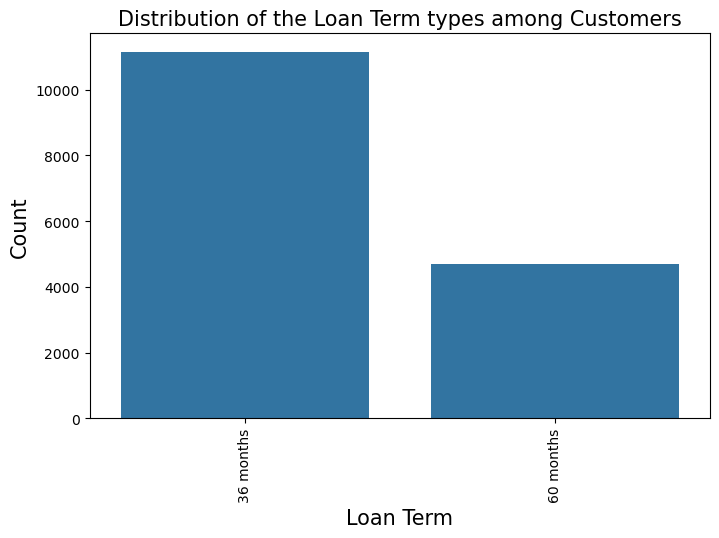

In [55]:
plt.figure(figsize=(8,5))
# Creating a unique color 
base_color = sns.color_palette()[0]

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=cleaned_df, x='term', color=base_color);
plt.xticks(rotation=90);
dum=plt.title('Distribution of the Loan Term types among Customers',fontsize=(15))
dum=plt.xlabel('Loan Term',fontsize=(15))
dum=plt.ylabel('Count',fontsize=(15));

## Observation: 
The distribution plot shows that the most common loan term that the  customers mostly take is 36 months term with a value count that is up to the double  of the 60 months term.

## Question: what percentage of the customers has fully paid or charged off

## Visualization

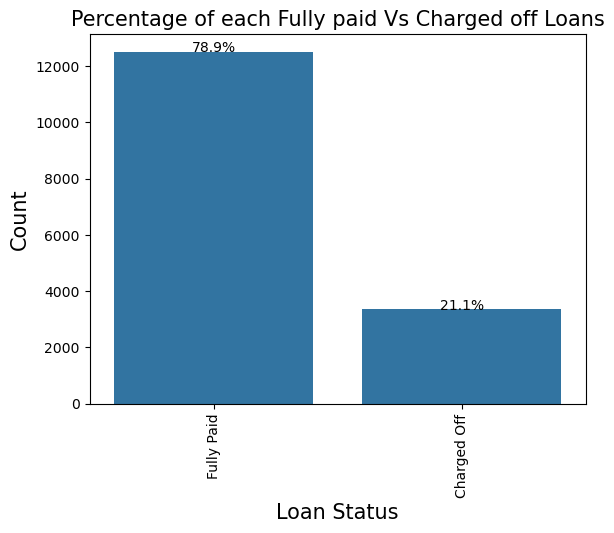

In [56]:
# Count the frequency of unique values in the `loan_status` column of cleaned_df dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = cleaned_df['loan_status'].value_counts()
type_counts
# Returns the sum of all not-null values in `loan_status` column
n_loan = cleaned_df['loan_status'].value_counts().sum()

# Return the highest frequency in the `loan_status` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count /n_loan
type_order = type_counts.index
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 10\%
tick_props = np.arange(0, max_prop, 0.1)
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sns.color_palette()[0]
sns.countplot(data=cleaned_df, x='loan_status', color=base_color, order=type_order);

# Recalculating the type_counts just to have clarity.
type_counts = cleaned_df['loan_status'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_loan)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    dum=plt.title('Percentage of each Fully paid Vs Charged off Loans',fontsize=(15))
    dum=plt.xlabel('Loan Status',fontsize=(15))
    dum=plt.ylabel('Count',fontsize=(15));

### Observation:
The plot shows that a 78.9% of all the loans given out was fully paid, while 21.1% were Charged Off Loans

## Question: What is the distribution of loan amount?

## Visualization

In [57]:
cleaned_df['loan_amnt'].describe()

count    15863.000000
mean     16015.383282
std       9403.993436
min       1000.000000
25%       8400.000000
50%      14550.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

(array([ 364.,  907., 1945., 1351., 2522.,  913., 1622.,  757., 1620.,
         713.,  765.,  424.,  743.,  137.,  894.,  186.]),
 array([    0,  2500,  5000,  7500, 10000, 12500, 15000, 17500, 20000,
        22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000]),
 <BarContainer object of 16 artists>)

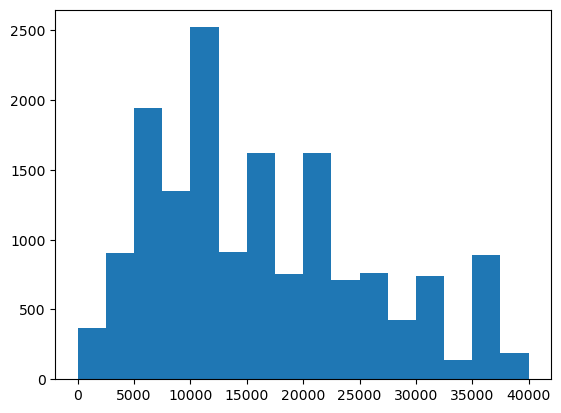

In [58]:
binss=np.arange(0,cleaned_df['loan_amnt'].max()+2500,2500)
plt.hist(data= cleaned_df, x='loan_amnt',bins = binss)

## Observation: 

From the summary statistics, the loan distribution varies from a minimum of value 1000 to a maximum value of 40000 with a mean value of 16000. From the distribution plot, most of the loan amount are concentrated between 5000 to 22500. With only few values lieing below 5000 and greater than 22500.

## Question: What are the different purpose for which people do take a loan?

## Visualization

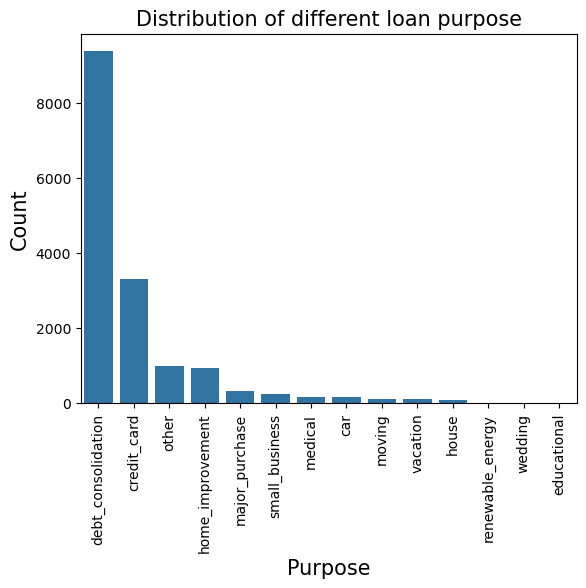

In [59]:
freq = cleaned_df['purpose'].value_counts()
base_color = sns.color_palette()[0]

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=cleaned_df, x='purpose', color=base_color, order=gen_order);
dum=plt.xticks(rotation=90);
dum=plt.title('Distribution of different loan purpose',fontsize= 15)
dum=plt.xlabel('Purpose',fontsize= 15)
dum=plt.ylabel('Count',fontsize= 15);

## Observation: 
From the plot, the most common purpose for which people take a loan is for debt consolidation followed by credit card loan which could be for different day to day transaction. Only few loans were taking for house, renewable energy, and wedding purpose. No loan was taken for educational purpose. The extremely low value for house loan is what noting as a good percentage of customers are on mortgage yet only few customers borrowed from the bank for house purpose. This could indicate that most of the customers are not getting their house loan from this bank due to one reason or the other and they are only borrowing form Lloyds bank to consolidate their loan in other banks.

## Question: What is Distribution of months since the borrower last delinquency(missed payment)?

## Visualization

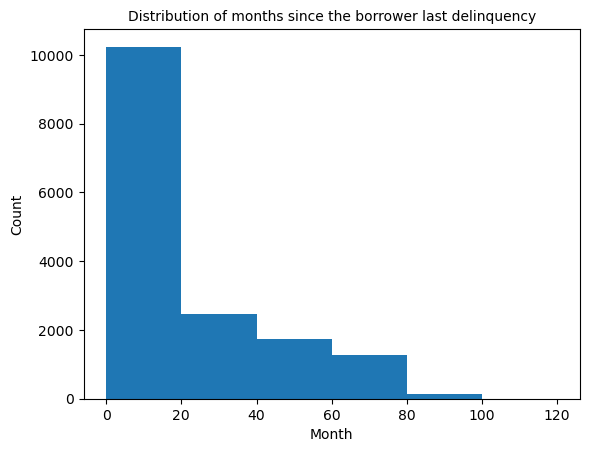

In [60]:
binss2=np.arange(0,cleaned_df['mths_since_last_delinq'].max()+20,20)
plt.hist(data= cleaned_df, x='mths_since_last_delinq',bins = binss2);
dum=plt.title('Distribution of months since the borrower last delinquency',fontsize= 10)
dum=plt.xlabel('Month',fontsize= 10)
dum=plt.ylabel('Count',fontsize= 10);

## Observation:
From the distribution as shown in the plot above, the months since last delinquency for most of the customers is concentrated between 0-20 and only few lies beyond 80. The data is obviously skewed a better way to visualize this using axis transformation with log distribution.

#### Visualizing the distribution with log-transformation of the x-axis

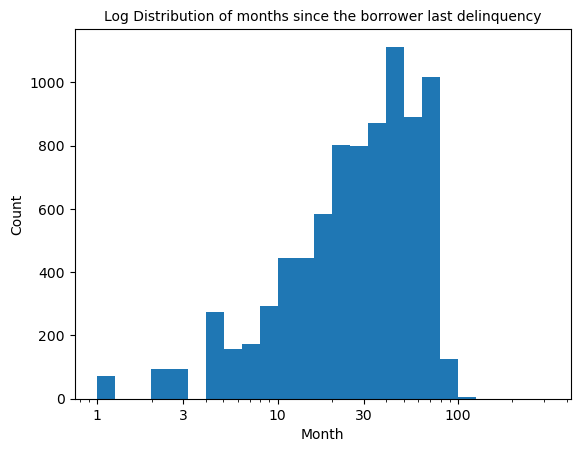

In [61]:

# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(0, 2.5+0.1, 0.1)

# Generate the x-ticks you want to apply
ticks = [1, 3, 10, 30, 100]
# Convert ticks into string values, to be display dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=cleaned_df, x='mths_since_last_delinq', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels)
dum=plt.title('Log Distribution of months since the borrower last delinquency',fontsize= 10)
dum=plt.xlabel('Month',fontsize= 10);
dum=plt.ylabel('Count',fontsize= 10);

### Observation:
From the above, it can be seen that most of the customers months since last delinquency are concentrated between 10 -90 months. The log distribution gave a better view of it.

## Question:  How does the number of mortgage accounts possessed by the customers varies among them?

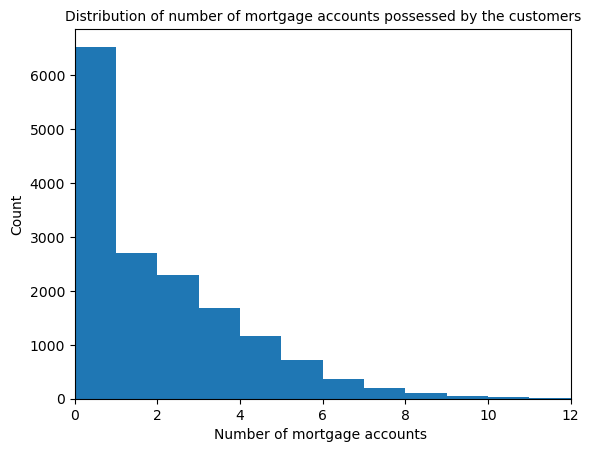

In [62]:
binss3=np.arange(0,cleaned_df['mort_acc'].max()+1,1)
plt.hist(data= cleaned_df, x='mort_acc',bins = binss3)
plt.xlim((0,12))
dum=plt.title('Distribution of number of mortgage accounts possessed by the customers',fontsize= 10)
dum=plt.xlabel('Number of mortgage accounts ',fontsize= 10)
dum=plt.ylabel('Count',fontsize= 10);

## Observation: 
The above plot show that the number of mortgage account possessed by the customers is cconcentrated between 0 and 1. Since the distribution is also skewed, an axis transformation may give a better view of the distribution

#### Visualizing the distribution with log-transformation of the x-axis

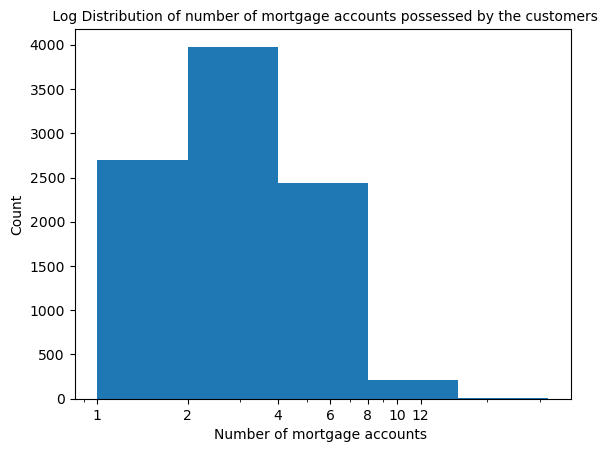

In [63]:

# Get the ticks for bins between [0 - maximum weight]
bins = 2** np.arange(0, 5+1, 1)

# Generate the x-ticks you want to apply
ticks = [1, 2, 4, 6, 8, 10, 12]

# Convert ticks into string values, to be display dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=cleaned_df, x='mort_acc', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels);
dum=plt.title(' Log Distribution of number of mortgage accounts possessed by the customers',fontsize= 10)
dum=plt.xlabel('Number of mortgage accounts ',fontsize= 10)
dum=plt.ylabel('Count',fontsize= 10);

## Observation: 
The log-transformation gave a better view, the number of mortgage account possessed by the customers lies between 1-7

# Bivariate Distribution

## Question: Are correlation between the numerical variables??

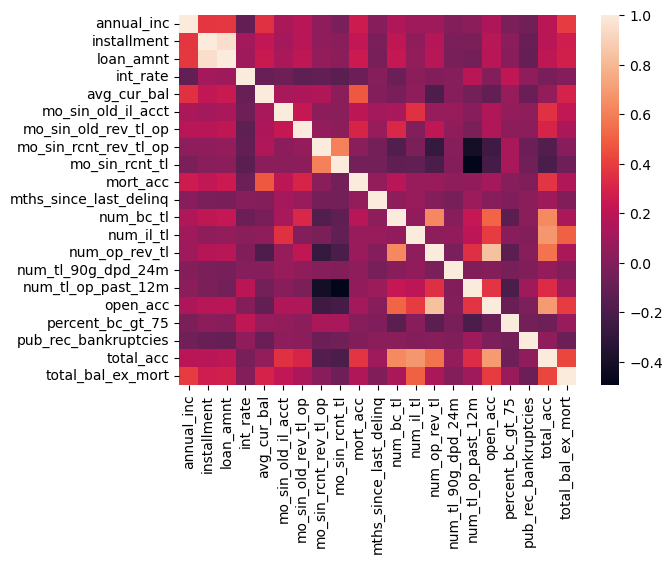

In [64]:
# Looking at mulitcollinearity
sns.heatmap(cleaned_df.corr());

## Observation: 
Some of the variables displays a very high positive correlation while some are not correlated at all.

## Question: what is the correlation between loan amount and installment

## Visualisation

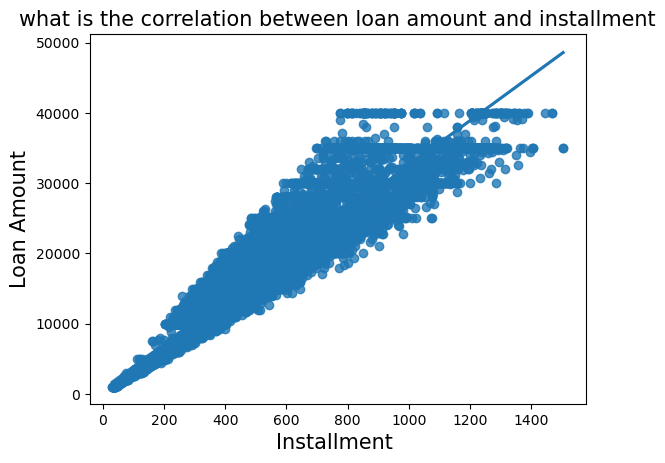

In [65]:
sns.regplot(data =cleaned_df, x= 'installment', y= 'loan_amnt')
dum=plt.title('what is the correlation between loan amount and installment',fontsize= 15)
dum=plt.xlabel('Installment ',fontsize= 15)
dum=plt.ylabel('Loan Amount',fontsize= 15);

## Observation
The above shows that there is a strong positive correlation between the loan amount and the installment payment. Indicating that the higher the loan amount the the highe the value of the installment payment. 

## Question: what is the correlation between customers customers  loan amount and int_rate

## Visualization

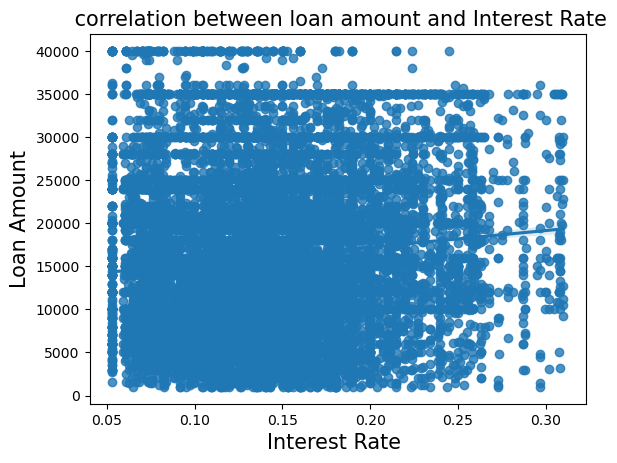

In [66]:
sns.regplot(data =cleaned_df, x= 'int_rate', y= 'loan_amnt')
dum=plt.title(' correlation between loan amount and Interest Rate',fontsize= 15)
dum=plt.xlabel('Interest Rate ',fontsize= 15)
dum=plt.ylabel('Loan Amount',fontsize= 15);

# Observation:
The above plot shows that there is no correlation between the interest rate and the loan amont. This may indicate the interest rate that there interest rate the bank give may depend on other variables such as the loan purpose.

## Question: what is the corellation between customers total balance excluding mortgage and Annual Income?

## Visualization

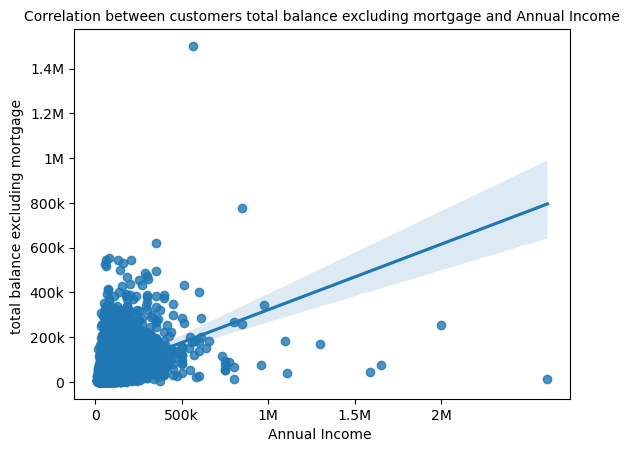

In [67]:
ax=sns.regplot(data =cleaned_df, y= 'total_bal_ex_mort', x= 'annual_inc')
plt.xticks([0,0.5e6,1e6,1.5e6,2e6], ['0','500k','1M', '1.5M', '2M'])
plt.yticks([0,0.2e6,0.4e6,0.6e6,0.8e6,1e6,1.2e6,1.4e6], ['0','200k','400k','600k','800k', '1M', '1.2M', '1.4M'])
ax.set_yticklabels([],minor = True)
ax.set_xticklabels([],minor = True)
dum=plt.title('Correlation between customers total balance excluding mortgage and Annual Income',fontsize= 10)
dum=plt.xlabel('Annual Income ',fontsize= 10)
dum=plt.ylabel('total balance excluding mortgage ',fontsize= 10);


## Observation:
The graph shows there is a positive correlation between customers annual incume and thecustomers total balance excluding mortgage

## Question: What is the relationship between total loan amount and loan status
    

## Visualization

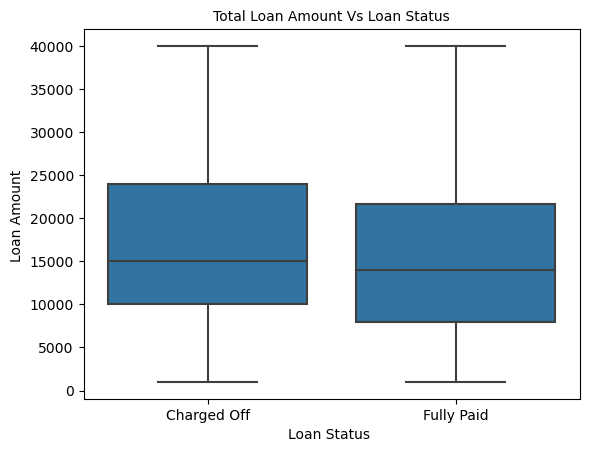

In [68]:
sns.boxplot(data =cleaned_df, y= 'loan_amnt', x= 'loan_status', color=base_color)
dum=plt.title('Total Loan Amount Vs Loan Status',fontsize= 10)
dum=plt.xlabel('Loan Status ',fontsize= 10)
dum=plt.ylabel('Loan Amount ',fontsize= 10);

### Observation: 
The above plot shows that, while there is no much differece between the amount of loan taken by those that fully pained and those that were charge off., there is a slight difference in their mean value. Those with loans that are charge of on average, takes slightly a larger amount of loana that were able to fully pay.

## Question: What is the relationship between  loan amount and home ownership status

### Visualisation

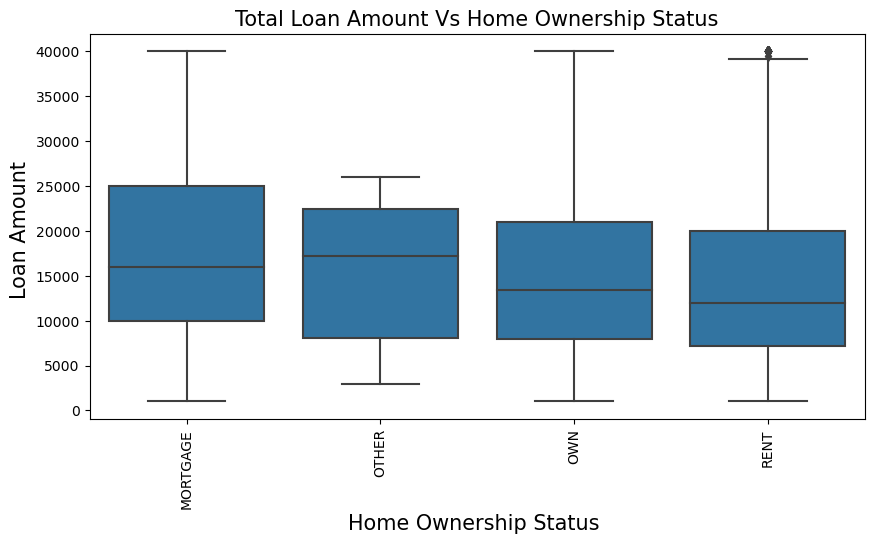

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(data =cleaned_df, y= 'loan_amnt', x= 'home_ownership', color=base_color)
plt.xticks(rotation=90)
dum=plt.title('Total Loan Amount Vs Home Ownership Status',fontsize= 15)
dum=plt.xlabel('Home Ownership Status ',fontsize= 15)
dum=plt.ylabel('Loan Amount ',fontsize= 15);

### Observation: 
From the box plot, the distribution of the amount of loan taken by the customers with different home ownership status type is approximately the same for customers with Mortgage,Rent and Own status ranging from a minumum of about 1000 to a maximum value of about 40000 with only a slight difference in their means. The only difference is observed in the loan amount take by the customers that falls in the category of others. The mean and minimum value is slightly higher than the others while maximum value is lower than that of the rest

## Question: What type of loan is mostly charged off

## Vizualization

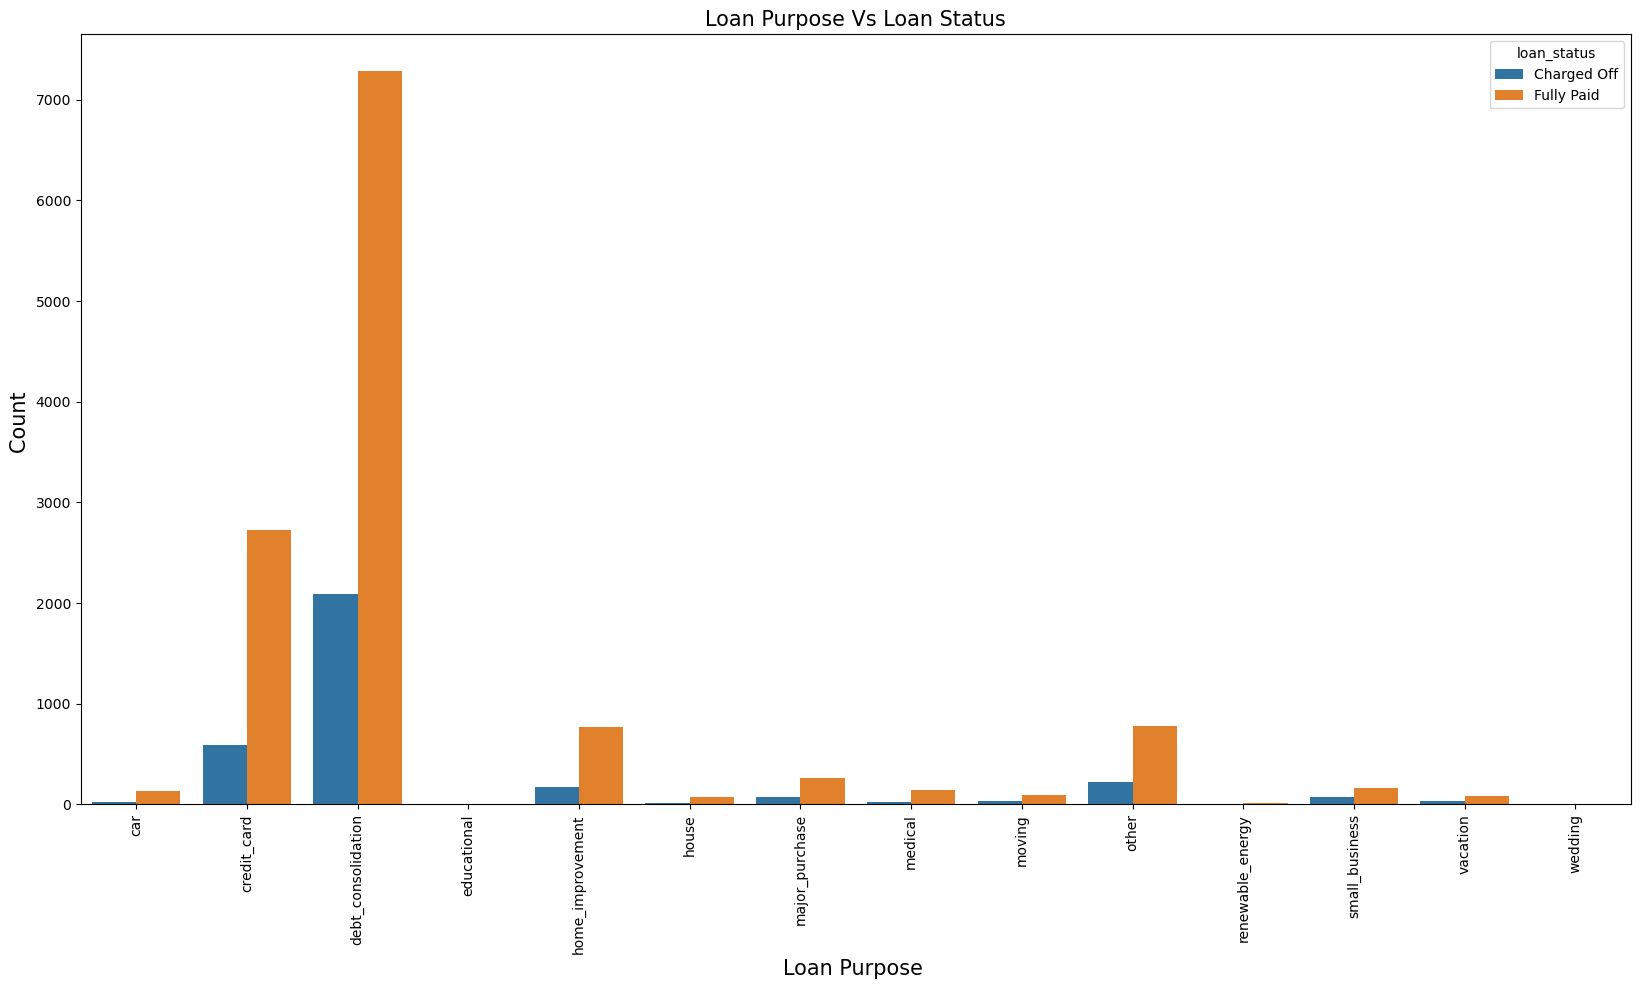

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(data = cleaned_df, x = 'purpose', hue = 'loan_status')
plt.xticks(rotation=90)
dum=plt.title('Loan Purpose Vs Loan Status',fontsize= 15)
dum=plt.xlabel('Loan Purpose ',fontsize= 15)
dum=plt.ylabel('Count ',fontsize= 15);


## Observation: 
The distribution of rate charge off  and fully paid load seems the same accross all the loan purpose type. The count of Fully paid loan for each purpose is higher than that  of the charged off  loans.

### Visullisation : To view the data more closely, a limit is applied to zoom out the graph

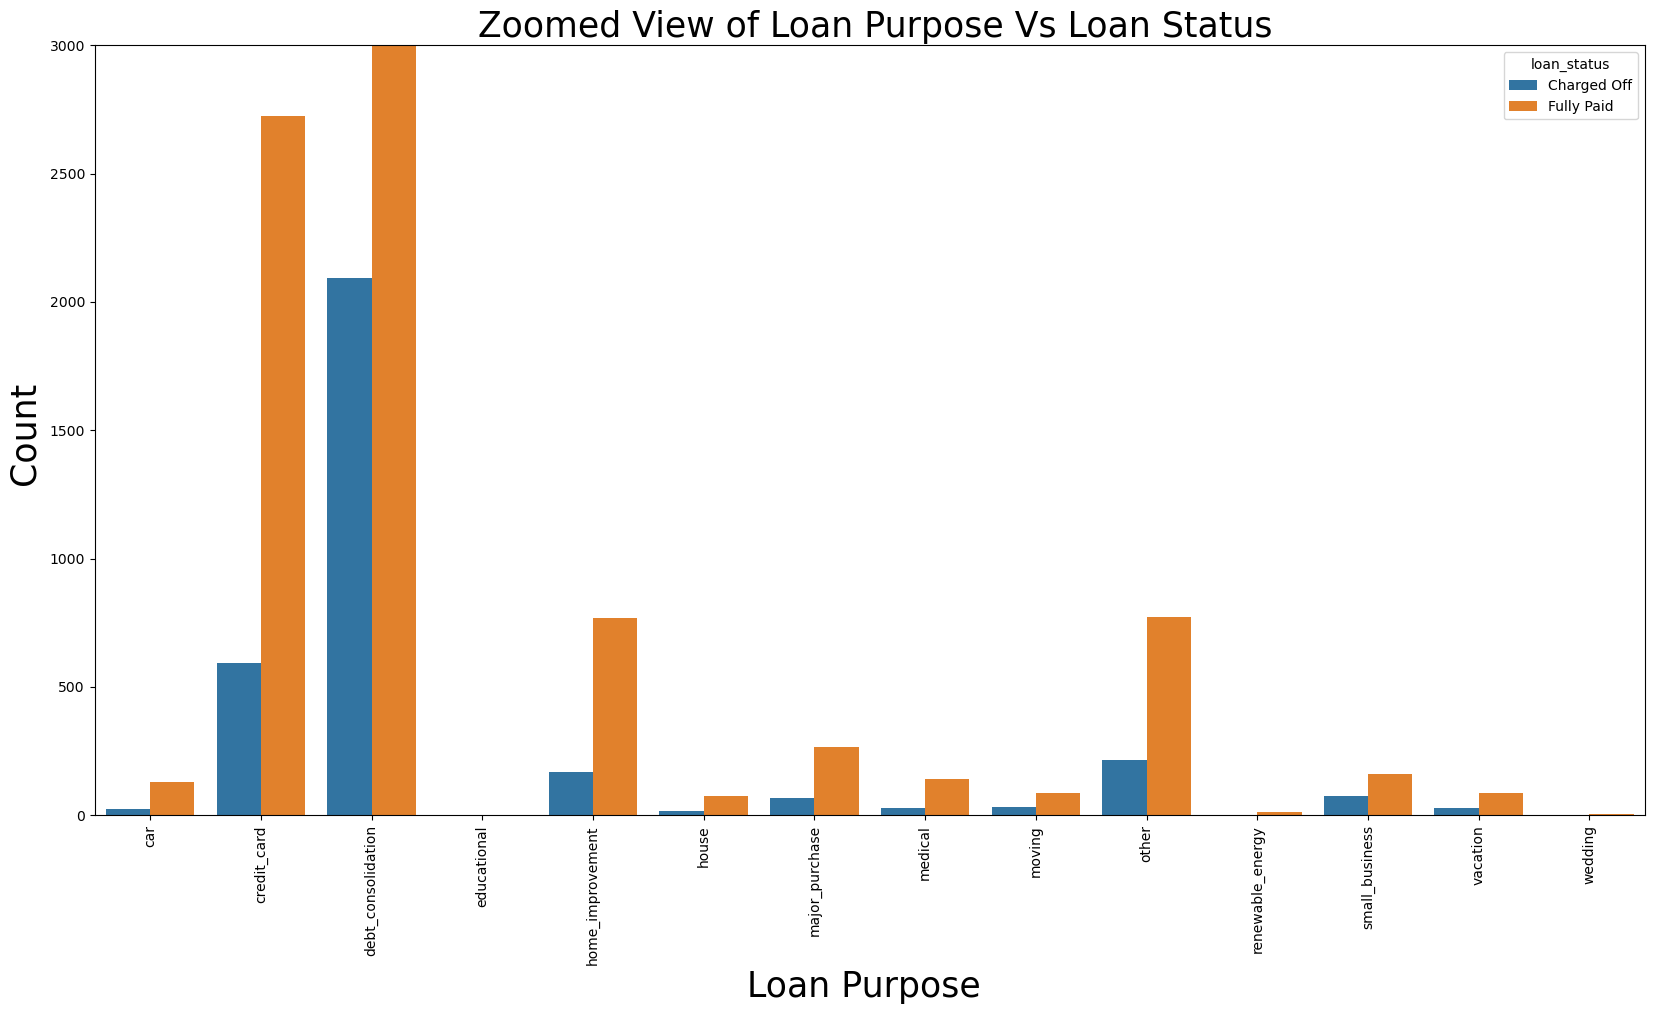

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(data = cleaned_df, x = 'purpose', hue = 'loan_status')
plt.xticks(rotation=90)
plt.ylim([0,3000])
dum=plt.title(' Zoomed View of Loan Purpose Vs Loan Status',fontsize= 25)
dum=plt.xlabel('Loan Purpose ',fontsize= 25)
dum=plt.ylabel('Count ',fontsize= 25);

# Multivariate Visualization

### Question: Are there differences between fully paid loan and charged off loans interms of interest rate and loan amount?

### Visualisation

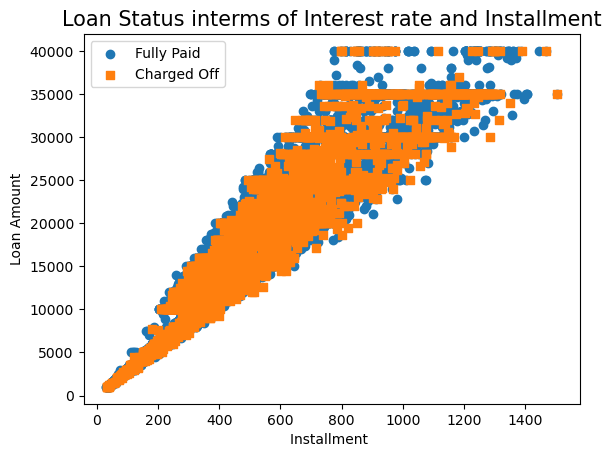

In [73]:
status_markers = [['Fully Paid', 'o'],
               ['Charged Off', 's']]
for ttype, marker in status_markers:
    status_data = cleaned_df[cleaned_df['loan_status']==ttype]
    plt.scatter(data =status_data, y= 'loan_amnt', x = 'installment', marker = marker)
plt.legend(['Fully Paid','Charged Off'])
dum=plt.title('Loan Status interms of Interest rate and Installment',fontsize= 15)
dum=plt.xlabel('Installment ',fontsize= 10)
dum=plt.ylabel('Loan Amount',fontsize= 10);

## Observation:
The plot shows that there is an overlapping between the differnt loan status across different value of the loan amount and number of intallment payment on the loan.

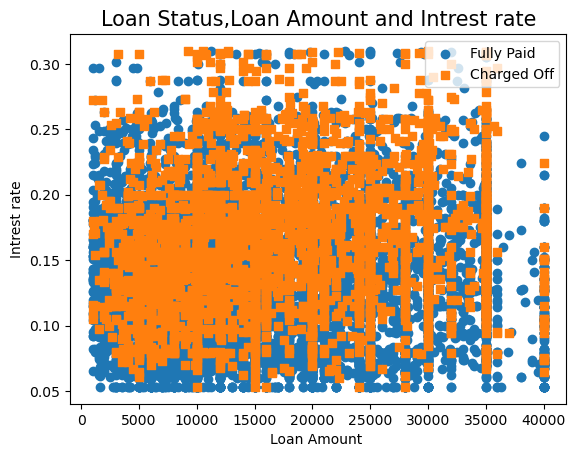

In [74]:
status_markers = [['Fully Paid', 'o'],
               ['Charged Off', 's']]
for ttype, marker in status_markers:
    status_data = cleaned_df[cleaned_df['loan_status']==ttype]
    plt.scatter(data =status_data, x= 'loan_amnt', y= 'int_rate', marker = marker)
plt.legend(['Fully Paid','Charged Off'])
dum=plt.title('Loan Status,Loan Amount and Intrest rate',fontsize= 15)
dum=plt.xlabel('Loan Amount ',fontsize= 10)
dum=plt.ylabel('Intrest rate',fontsize= 10);

##  Question : what is the relationship between Loan term, Annual Income and Loan Status

### Visualization

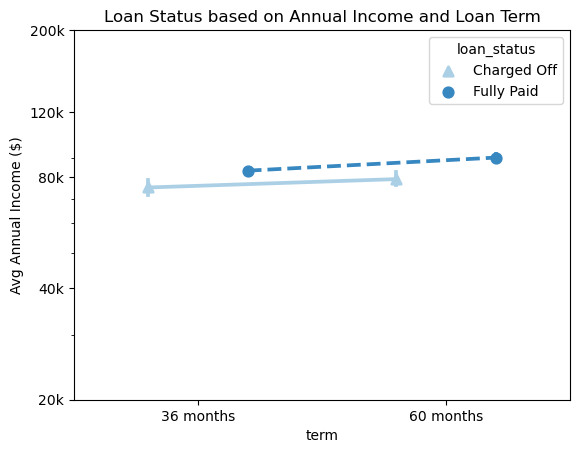

In [75]:
ax = sns.pointplot(data = cleaned_df, x = 'term', y = 'annual_inc', hue = 'loan_status',
           palette = 'Blues', linestyles = ['-','--'], dodge = 0.4,
    markers=["^", "o"])
plt.title('Loan Status based on Annual Income and Loan Term')
plt.ylabel('Avg Annual Income ($)')
plt.yscale('log')
plt.yticks([2e4, 4e4, 8e4, 12e4, 20e4], ['20k', '40k', '80k', '120k',  '200k'])
ax.set_yticklabels([],minor = True)
plt.show();

## Observation : The plot above shows that charged off loans are more common with loan terms of 60 months.

In [76]:
## Question Relationship between loan amount, Installment and employment length

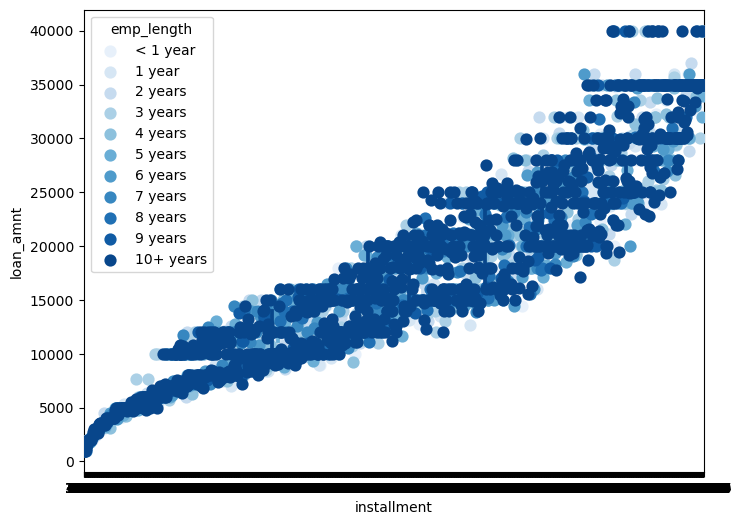

In [77]:
fig = plt.figure(figsize = [8,6])

ax = sns.pointplot(data =status_data, y= 'loan_amnt', x = 'installment', hue = 'emp_length',
           palette = 'Blues', linestyles = '', dodge = 0.6)
plt.show();

## Observation:
The plot shows that there is an overlap between loan amount nad installment for different  customers with different employment lenght

[]

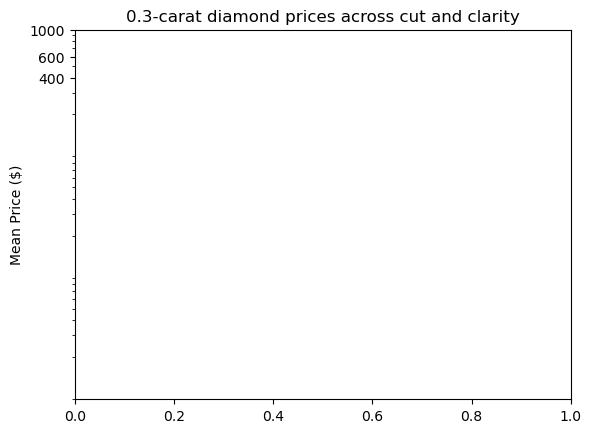

In [78]:
plt.title('0.3-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')
plt.yscale('log')
plt.yticks([4e2, 6e2, 1e3], ['400', '600', '1000'])
ax.set_yticklabels([],minor = True)

## Conclusion

Now-a-days, several people apply for loans for various reasons. However, there are several cases where people
do not repay the amount which causes huge financial loss. Hence, by using this way we can classify the loaners
among all, it would prevent the huge financial loss. From a proper analysis of the component the some of the observations made includes:
- The most common purpose for which people take a loan is for debt consolidation followed by credit card loan which could be for different day to day transaction. Only few loans were taking for house, renewable energy, and wedding purpose. No loan was taken for educational purpose. 
- 78.9% of all the loans given out was fully paid, while 21.1% were Charged Off Loans
- While there is no much differece between the amount of loan taken by those that fully pained and those that were charge off., there is a slight difference in their mean value. Those with loans that are charge of on average, takes slightly a larger amount of loana that were able to fully pay.
- There is no correlation between the interest rate and the loan amont. This may indicate the interest rate that there interest rate the bank give may depend on other variables such as the loan purpose